In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scripts.analise_exploratoria import *
from scripts.preprocessamento import *
import joblib

In [174]:
data = pd.read_csv("./data/RHP_data.csv")
data = data[['Altura', 'Peso', 'IDADE']]

In [175]:
converter_numeric(data, "IDADE")

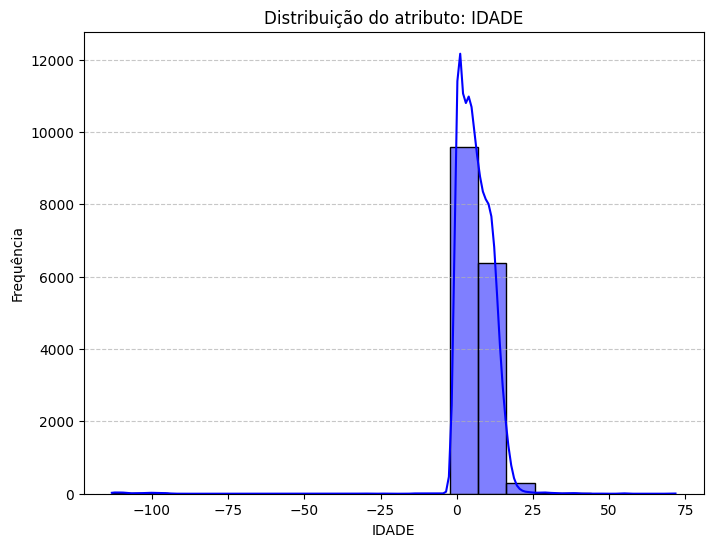

In [176]:
plot_hist(data, "IDADE")

In [177]:
data = data.dropna(subset='IDADE')
data = data.dropna(subset='Peso')

In [178]:
peso_invalido = data[data["Peso"] <= 0]

data = data.drop(peso_invalido.index)

In [179]:
altura_invalida = data[data["Altura"] < 50]

data = data.drop(altura_invalida.index)

In [180]:
idade_invalida = data[(data["IDADE"] <= 0) | (data["IDADE"] > 19)]

data = data.drop(idade_invalida.index)

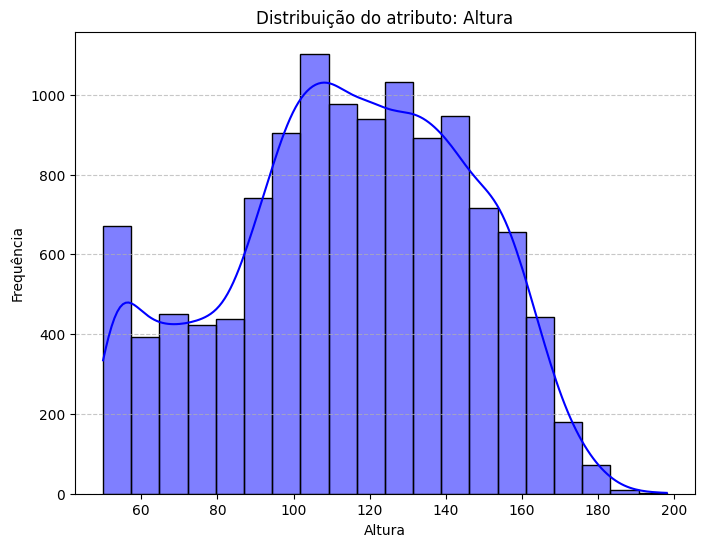

In [181]:
plot_hist(data, 'Altura')

In [182]:
X = data[['Peso', 'IDADE']]
y = data[["Altura"]].values.ravel()

In [183]:
from sklearn.linear_model import LinearRegression

In [184]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [185]:
from sklearn.metrics import make_scorer, mean_squared_error

In [186]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [187]:
linear_regressor = LinearRegression()

In [188]:
linear_regressor.fit(X,y)

LinearRegression()

In [189]:
import joblib
joblib.dump(linear_regressor, "modelo_altura.pkl")

['modelo_altura.pkl']

In [190]:
data_2 = pd.read_csv("./data/RHP_data.csv")
data_2 = data_2[['Id', "Altura", "Peso", "IDADE"]]

In [191]:
data_2[data_2["Peso"] <= 0]

,Id,Altura,Peso,IDADE
2,3,0,0.0,-4.05
15,16,0,0.0,4.84
25,26,0,0.0,7.36
48,49,0,0.0,1.32
64,65,0,0.0,NaN
...,...,...,...,...
17837,17838,0,0.0,NaN
17839,17840,0,0.0,NaN
17843,17844,0,0.0,5.29
17848,17849,0,0.0,NaN


In [192]:
data_2[data_2["Altura"] < 50]

,Id,Altura,Peso,IDADE
2,3,0,0.0,-4.05
12,13,0,42.0,15.5
15,16,0,0.0,4.84
20,21,0,1.0,8.1
21,22,0,45.0,15.86
...,...,...,...,...
17848,17849,0,0.0,NaN
17854,17855,0,30.0,NaN
17855,17856,0,0.0,NaN
17862,17863,0,63.0,12.3


In [193]:
converter_numeric(data_2, "IDADE")

In [194]:
data_2.isna().sum()

Id           0
Altura       0
Peso       318
IDADE     1496
dtype: int64

In [195]:
data_2 = data_2.dropna(subset="IDADE")
data_2 = data_2.dropna(subset="Peso")

In [196]:
data_2.isna().sum()

Id        0
Altura    0
Peso      0
IDADE     0
dtype: int64

In [197]:
peso_invalido = data_2[data_2["Peso"] <= 0]

data_2 = data_2.drop(peso_invalido.index)

In [198]:
data_2.isna().sum()

Id        0
Altura    0
Peso      0
IDADE     0
dtype: int64

In [199]:
data_2[data_2["IDADE"].isna()]

,Id,Altura,Peso,IDADE


In [200]:
idade_invalida = data_2[
    (data_2["IDADE"] <= 0) | (data_2["IDADE"] > 19) | data_2["IDADE"].isna()
]


data_2 = data_2.drop(idade_invalida.index)

In [201]:
data_2

,Id,Altura,Peso,IDADE
0,1,51,5.0,0.12
1,2,50,3.5,0.02
3,4,65,8.1,0.50
4,5,142,39.5,9.60
5,6,112,26.0,4.40
...,...,...,...,...
17866,17867,75,9.5,1.11
17867,17868,85,10.6,2.14
17868,17869,76,9.5,1.20
17869,17870,75,12.0,0.81


In [202]:
data_2.loc[data_2["Altura"] < 50, "Altura"] = np.nan

In [203]:
data_missing = data_2[data_2["Altura"].isna()]

In [204]:
data_missing

,Id,Altura,Peso,IDADE
12,13,NaN,42.0,15.50
20,21,NaN,1.0,8.10
21,22,NaN,45.0,15.86
28,29,NaN,34.0,6.39
31,32,NaN,17.1,4.24
...,...,...,...,...
17838,17839,NaN,12.0,0.14
17844,17845,NaN,4.8,0.20
17845,17846,NaN,61.0,10.79
17862,17863,NaN,63.0,12.30


In [205]:
X_t = data_missing[[ 'Peso','IDADE']]

In [206]:
y = linear_regressor.predict(X_t)
y_rounded = np.round(y, 0)

In [207]:
data_missing['Altura'] = y_rounded

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_25976\3887302943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing['Altura'] = y_rounded


In [208]:
data_2_updated = data_2.set_index("Id").combine_first(data_missing.set_index("Id"))

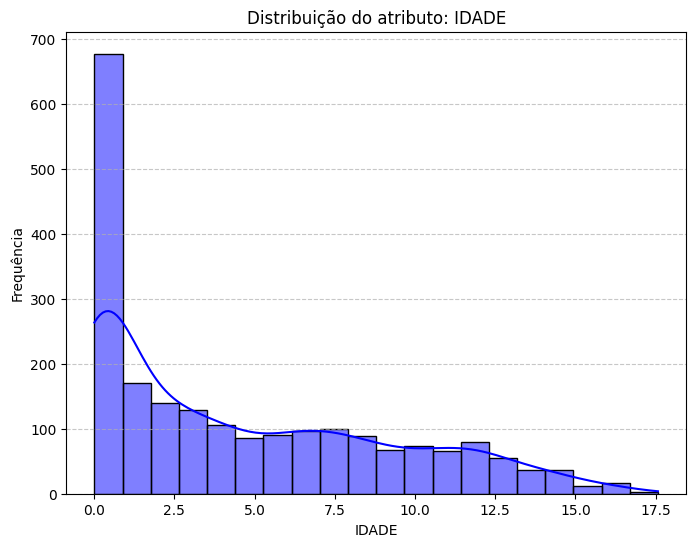

In [209]:
plot_hist(data_missing, 'IDADE')

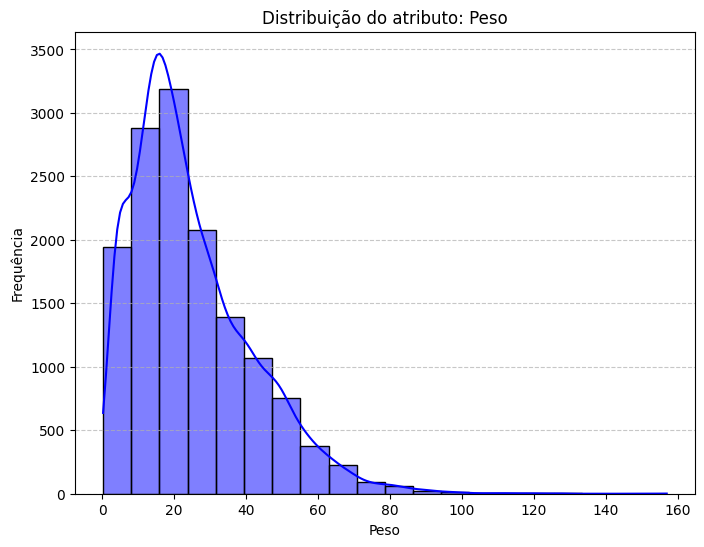

In [210]:
plot_hist(data_2_updated, 'Peso')

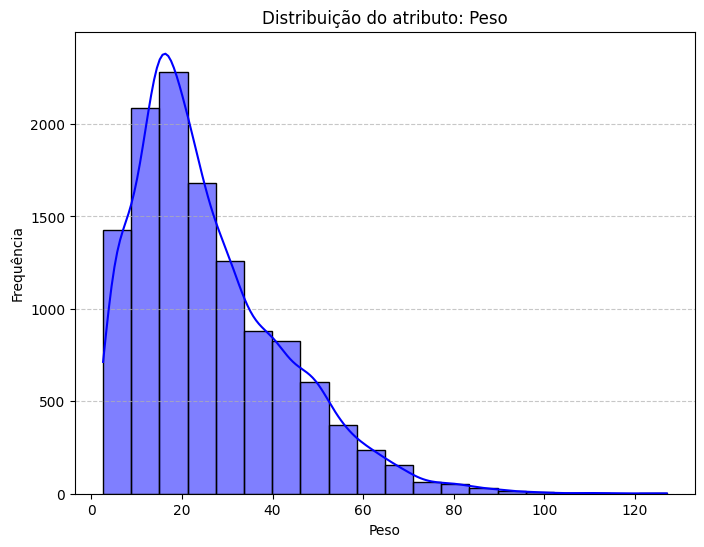

In [211]:
plot_hist(data, 'Peso')

In [212]:
datax = pd.read_csv("./data/RHP_data.csv")

In [213]:
altura_invalida = data[data["Altura"] < 50]

datax = datax.drop(altura_invalida.index)

In [214]:
datax['Altura'] = datax['Altura'].fillna(datax['Altura'].median())

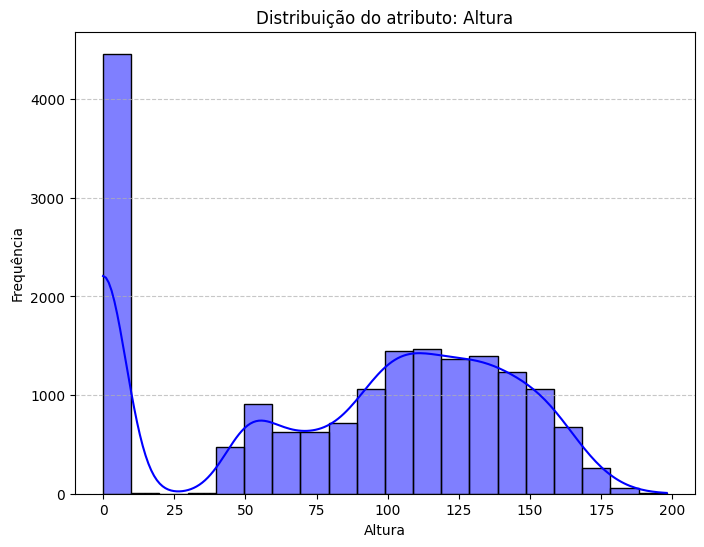

In [215]:
plot_hist(datax, 'Altura')